In [8]:
import pandas as pd

# Specify the file path
file_path = r'C:\Users\Tiyasa\Desktop\Courses_Sem1\MTH 522\fatal-police-shootings-data.xls'

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)
df.head(5)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [16]:
import pandas as pd

# Specify the file path
file_path = r'C:\Users\Tiyasa\Desktop\Courses_Sem1\MTH 522\fatal-police-shootings-data.xls'

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

df.dropna(subset=['latitude', 'longitude'], inplace=True)
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7997,8690,NaN,2022-11-30,shot,vehicle,NaN,M,NaN,Mesa,AZ,False,attack,NaN,False,-111.810,33.401,True
7998,8692,NaN,2022-11-30,shot,knife,NaN,M,NaN,Mariposa County,CA,False,other,NaN,False,-119.986,37.500,True
7999,8694,NaN,2022-12-01,shot,gun,38.0,M,NaN,Tulare,CA,False,attack,NaN,False,-119.326,36.240,True
8000,8695,NaN,2022-12-01,shot,gun,NaN,M,NaN,Topeka,KS,False,other,NaN,False,-95.694,39.032,True


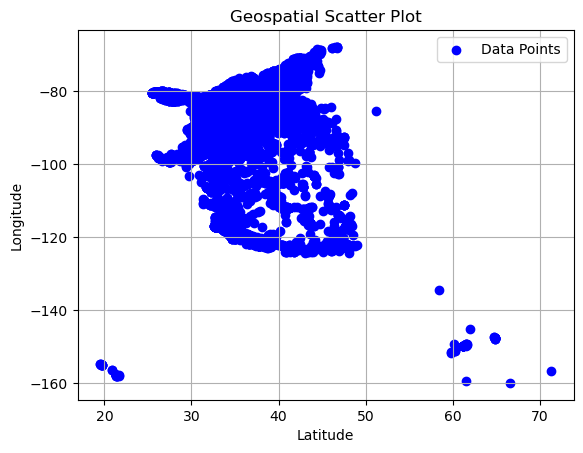

In [10]:
import matplotlib.pyplot as plt

# Plot the latitude and longitude points
plt.scatter(df['latitude'], df['longitude'], c='b', marker='o', label='Data Points')

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Geospatial Scatter Plot')

# Display the plot
plt.legend()
plt.grid()
plt.show()

In [14]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Specify the file path
file_path = r'C:\Users\Tiyasa\Desktop\Courses_Sem1\MTH 522\fatal-police-shootings-data.xls'

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)
df.head(5)

df.dropna(subset=['latitude', 'longitude'], inplace=True)

# Create a Folium map centered around the United States
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Coordinates for the United States

# Add dots for each data point
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,  # Adjust the radius as needed
        color='blue',  # Customize the color of the dots
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
    ).add_to(m)

# Display the map
m.save('map.html')  # Save the map as an HTML file

count    7499.000000
mean       37.209228
std        12.979490
min         2.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        92.000000
Name: age, dtype: float64


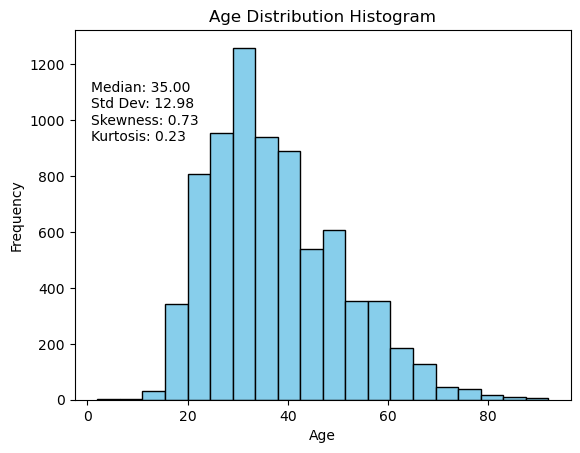

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Specify the file path
file_path = r'C:\Users\Tiyasa\Desktop\Courses_Sem1\MTH 522\fatal-police-shootings-data.xls'

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Drop rows with missing values in the 'age' column
df.dropna(subset=['age'], inplace=True)

# Plot a histogram of the 'age' column
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution Histogram')

# Display descriptive statistics
statistics = df['age'].describe()
print(statistics)
median = statistics['50%']  # Median
std_dev = statistics['std']  # Standard Deviation
skewness = stats.skew(df['age'])  # Skewness
kurt = stats.kurtosis(df['age'])  # Kurtosis

# Add statistics to the plot
textstr = f'Median: {median:.2f}\nStd Dev: {std_dev:.2f}\nSkewness: {skewness:.2f}\nKurtosis: {kurt:.2f}'
plt.gcf().text(0.15, 0.65, textstr, fontsize=10)

# Show the histogram and descriptive statistics
plt.show()

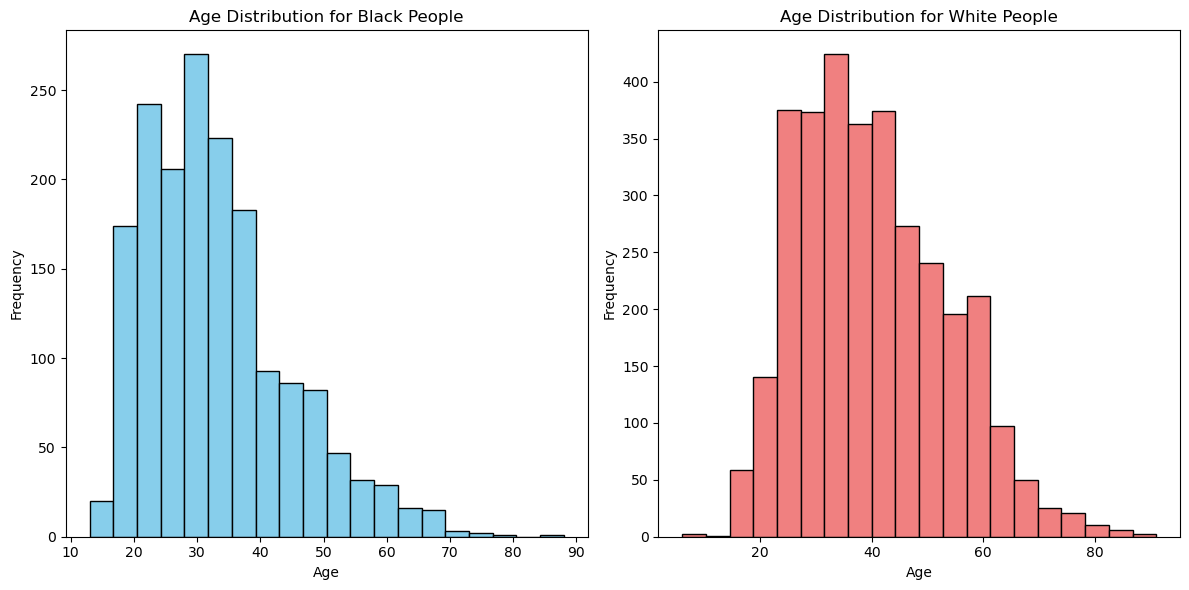

Statistics for Black People's Ages:
count    1725.000000
mean       32.928116
std        11.388649
min        13.000000
25%        24.000000
50%        31.000000
75%        39.000000
max        88.000000
Name: age, dtype: float64
Median: 31.00
Standard Deviation: 11.39
Skewness: 0.96
Kurtosis: 3.81

Statistics for White People's Ages:
count    3244.000000
mean       40.125462
std        13.162144
min         6.000000
25%        30.000000
50%        38.000000
75%        49.000000
max        91.000000
Name: age, dtype: float64
Median: 38.00
Standard Deviation: 13.16
Skewness: 0.53
Kurtosis: 2.86

Mean Age for White People: 40.13
Mean Age for Black People: 32.93
Mean Age Difference (White - Black): 7.20


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Specify the file path
file_path = r'C:\Users\Tiyasa\Desktop\Courses_Sem1\MTH 522\fatal-police-shootings-data.xls'

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Filter data for Black and White people
black_data = df[df['race'] == 'B'].dropna(subset=['age'])
white_data = df[df['race'] == 'W'].dropna(subset=['age'])

# Plot histograms for Black and White people's ages
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

plt.subplot(1, 2, 1)  # Create the left subplot
plt.hist(black_data['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for Black People')

plt.subplot(1, 2, 2)  # Create the right subplot
plt.hist(white_data['age'], bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for White People')

# Calculate descriptive statistics for Black people's ages
statistics_black = black_data['age'].describe()
median_black = black_data['age'].median()
std_dev_black = black_data['age'].std()
skewness_black = stats.skew(black_data['age'])
kurtosis_black = stats.kurtosis(black_data['age'], fisher=False)

# Calculate descriptive statistics for White people's ages
statistics_white = white_data['age'].describe()
median_white = white_data['age'].median()
std_dev_white = white_data['age'].std()
skewness_white = stats.skew(white_data['age'])
kurtosis_white = stats.kurtosis(white_data['age'], fisher=False)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Print the statistics
print("Statistics for Black People's Ages:")
print(statistics_black)
print(f"Median: {median_black:.2f}")
print(f"Standard Deviation: {std_dev_black:.2f}")
print(f"Skewness: {skewness_black:.2f}")
print(f"Kurtosis: {kurtosis_black:.2f}")
print("\nStatistics for White People's Ages:")
print(statistics_white)
print(f"Median: {median_white:.2f}")
print(f"Standard Deviation: {std_dev_white:.2f}")
print(f"Skewness: {skewness_white:.2f}")
print(f"Kurtosis: {kurtosis_white:.2f}")


# Calculate the mean age for Black and White people
mean_age_black = black_data['age'].mean()
mean_age_white = white_data['age'].mean()

# Calculate the mean age difference
mean_age_difference =  mean_age_white - mean_age_black

# Print the mean ages and mean age difference
print(f"\nMean Age for White People: {mean_age_white:.2f}")
print(f"Mean Age for Black People: {mean_age_black:.2f}")
print(f"Mean Age Difference (White - Black): {mean_age_difference:.2f}")

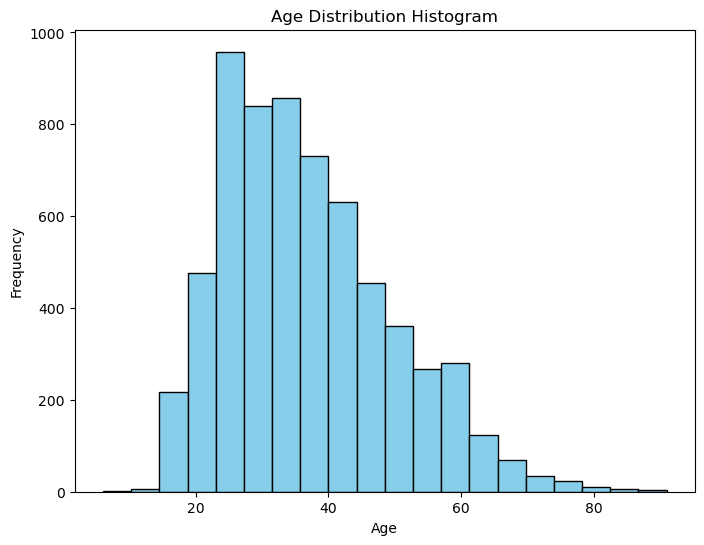

count    6350.000000
mean       36.780157
std        12.669423
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Specify the file path
file_path = r'C:\Users\Tiyasa\Desktop\Courses_Sem1\MTH 522\fatal-police-shootings-data.xls'

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Drop missing values in the "age" and "race" columns
df.dropna(subset=['age', 'race'], inplace=True)

# Create a histogram for the "age" column
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Calculate and print the descriptive statistics for the "age" column
age_statistics = df['age'].describe()
print(age_statistics)

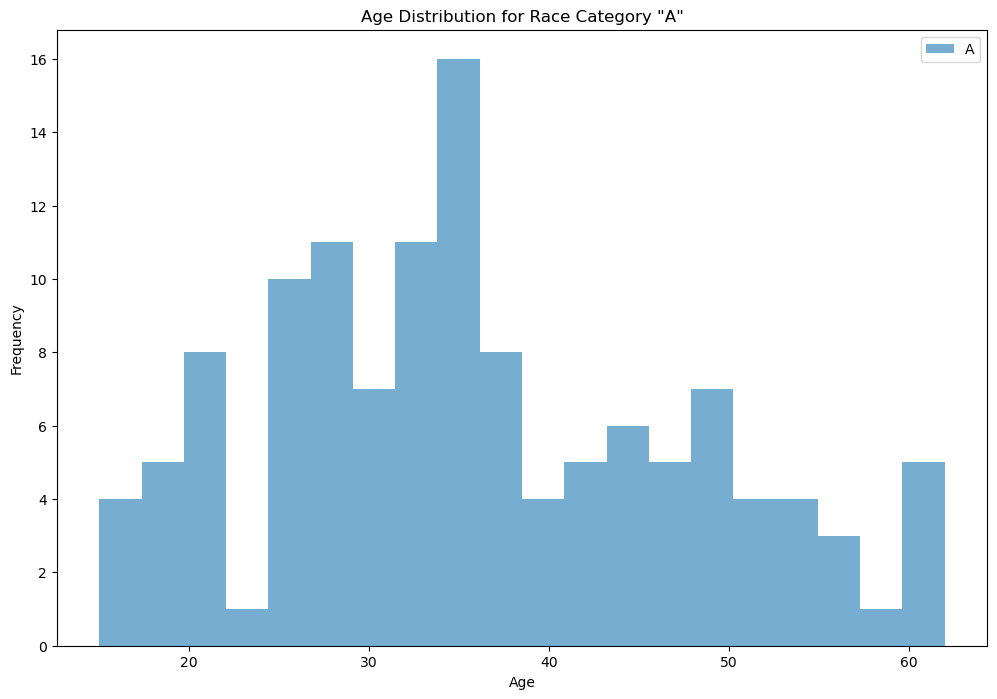

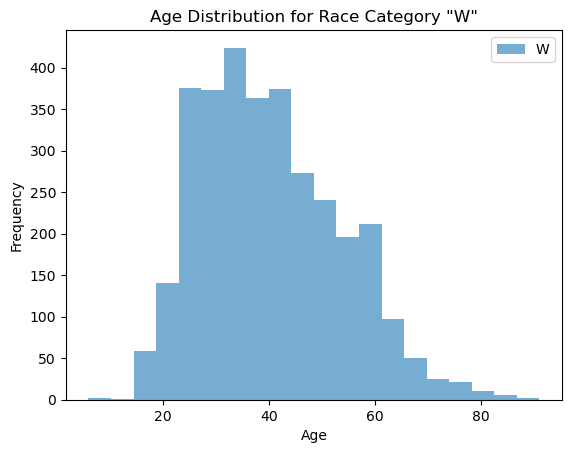

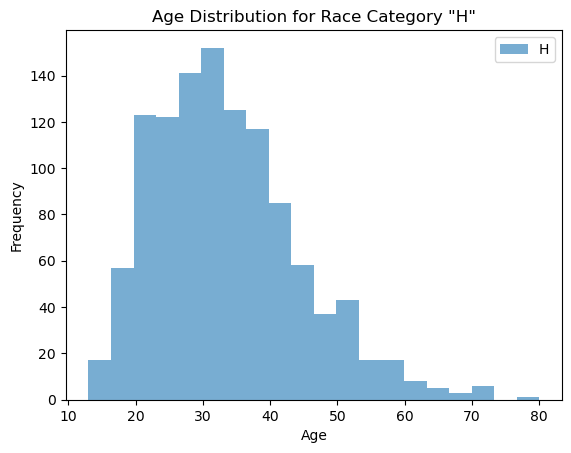

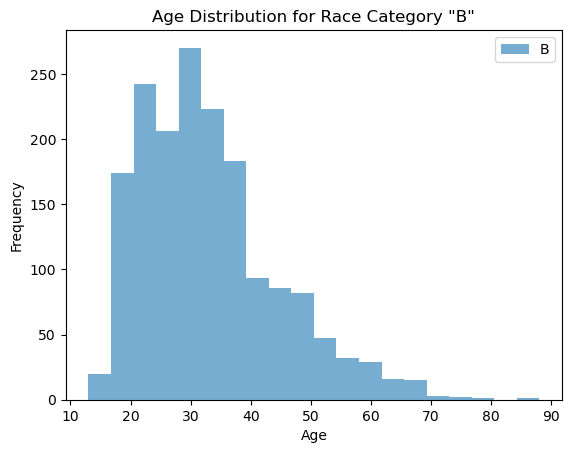

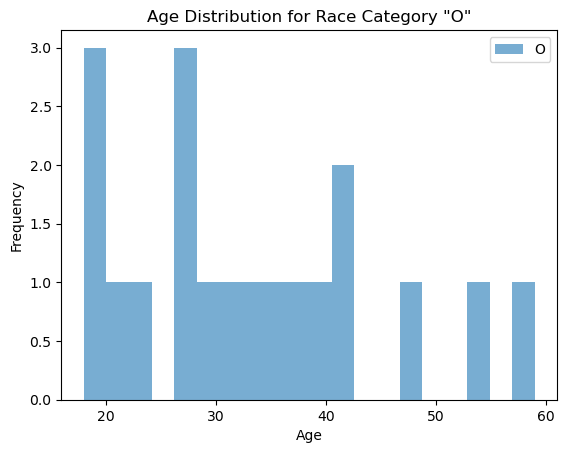

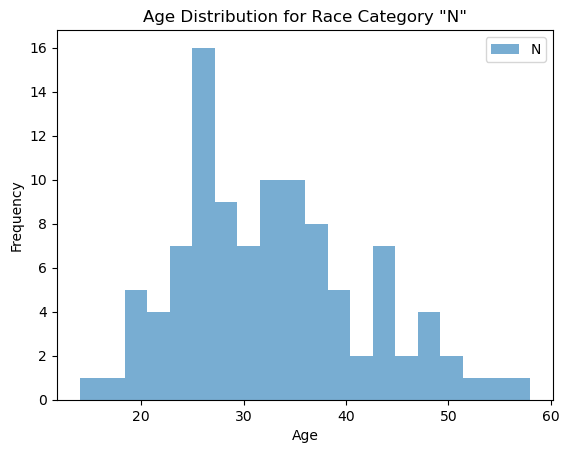

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Drop missing values in the "age" and "race" columns
df.dropna(subset=['age', 'race'], inplace=True)

# Create separate histograms for each race category
race_categories = df['race'].unique()

plt.figure(figsize=(12, 8))
for race in race_categories:
    plt.hist(df[df['race'] == race]['age'], bins=20, alpha=0.6, label=race)

    plt.title(f'Age Distribution for Race Category "{race}"')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

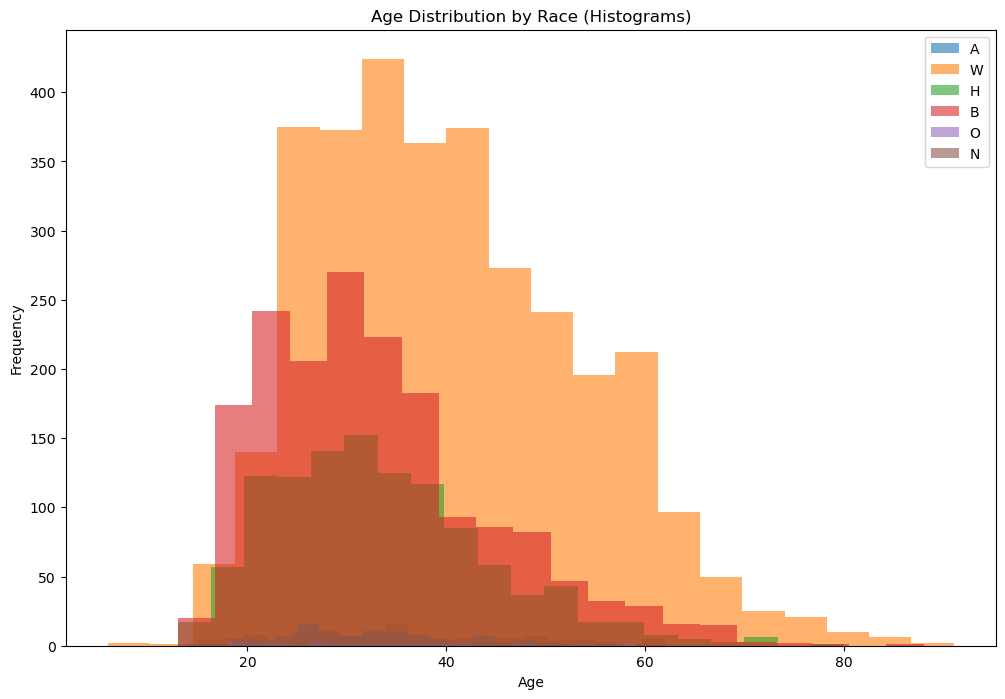

Descriptive Statistics:
       count       mean        std   min   25%   50%   75%   max
race                                                            
A      125.0  35.960000  11.592127  15.0  27.0  35.0  45.0  62.0
B     1725.0  32.928116  11.388649  13.0  24.0  31.0  39.0  88.0
H     1134.0  33.590829  10.743505  13.0  26.0  32.0  39.0  80.0
N      103.0  32.650485   8.994234  14.0  26.5  32.0  37.5  58.0
O       19.0  33.473684  11.796273  18.0  25.5  31.0  40.5  59.0
W     3244.0  40.125462  13.162144   6.0  30.0  38.0  49.0  91.0


Descriptive Statistics per race:

Race: A
Mean Age: 35.96
Median Age: 35.00
Standard Deviation: 11.59
Variance: 134.38
Skewness: 0.33
Kurtosis: 2.35


Race: B
Mean Age: 32.93
Median Age: 31.00
Standard Deviation: 11.39
Variance: 129.70
Skewness: 0.96
Kurtosis: 3.81


Race: H
Mean Age: 33.59
Median Age: 32.00
Standard Deviation: 10.74
Variance: 115.42
Skewness: 0.80
Kurtosis: 3.73


Race: N
Mean Age: 32.65
Median Age: 32.00
Standard Deviation: 8.99
Va

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Specify the file path
file_path = r'C:\Users\Tiyasa\Desktop\Courses_Sem1\MTH 522\fatal-police-shootings-data.xls'

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Drop missing values in the "age" and "race" columns
df.dropna(subset=['age', 'race'], inplace=True)

# Create separate histograms for each race category
race_categories = df['race'].unique()

plt.figure(figsize=(12, 8))
for race in race_categories:
    plt.hist(df[df['race'] == race]['age'], bins=20, alpha=0.6, label=race)

plt.title('Age Distribution by Race (Histograms)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Group the data by the "race" column and calculate descriptive statistics for each group
race_statistics = df.groupby('race')['age'].describe()

# Print the descriptive statistics for each race
print("Descriptive Statistics:")
print(race_statistics)

# Group the data by the "race" column
grouped = df.groupby('race')

print("\n\nDescriptive Statistics per race:")

# Calculate and print Mean, Median, Stdev, Variance, Skewness, and Kurtosis for each race category
for race, group in grouped:
    age_data = group['age']
    mean_age = age_data.mean()
    median_age = age_data.median()
    stdev_age = age_data.std()
    variance_age = age_data.var()
    skewness_age = stats.skew(age_data)
    kurtosis_age = stats.kurtosis(age_data, fisher=False)  # Set fisher=False for accurate kurtosis

    print(f"\nRace: {race}")
    print(f"Mean Age: {mean_age:.2f}")
    print(f"Median Age: {median_age:.2f}")
    print(f"Standard Deviation: {stdev_age:.2f}")
    print(f"Variance: {variance_age:.2f}")
    print(f"Skewness: {skewness_age:.2f}")
    print(f"Kurtosis: {kurtosis_age:.2f}")
    print()

In [2]:
import pandas as pd

# Specify the file path
file_path = r'C:\Users\Tiyasa\Desktop\Courses_Sem1\MTH 522\fatal-police-shootings-data.xls'

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Drop missing values in the "age" and "race" columns
df.dropna(subset=['age', 'race'], inplace=True)

# Group the data by the "race" column
grouped = df.groupby('race')

print("Variances per race:")

# Calculate and print the variance for each race category
for race, group in grouped:
    age_data = group['age']
    variance_age = age_data.var()

    print(f"Race: {race}")
    print(f"Variance: {variance_age:.2f}")
    print()

Variances per race:
Race: A
Variance: 134.38

Race: B
Variance: 129.70

Race: H
Variance: 115.42

Race: N
Variance: 80.90

Race: O
Variance: 139.15

Race: W
Variance: 173.24

